In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uts-big-data/UTS big data.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

In [3]:
df0 = pd.read_csv('../input/uts-big-data/UTS big data.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Emitten                  3 non-null      object 
 1   DER                      3 non-null      float64
 2   Operating Profit Margin  3 non-null      float64
 3   Return On Asset          3 non-null      float64
 4   Sales Growth             3 non-null      float64
 5   Category                 0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 272.0+ bytes


In [4]:
df0.describe()

,DER,Operating Profit Margin,Return On Asset,Sales Growth,Category
count,3.000000,3.000000,3.000000,3.000000,0.0
mean,1.342500,72.797333,-5.706533,-0.380933,NaN
std,0.502239,4.793739,14.116778,11.901845,NaN
min,0.857300,67.262000,-21.963000,-14.124000,NaN
25%,1.083650,71.413500,-10.290000,-3.816700,NaN
50%,1.310000,75.565000,1.383000,6.490600,NaN
75%,1.585100,75.565000,2.421700,6.490600,NaN
max,1.860200,75.565000,3.460400,6.490600,NaN


In [5]:
df0.drop(["Emitten","Category"], axis=1, inplace=True)

<Figure size 1080x1080 with 0 Axes>

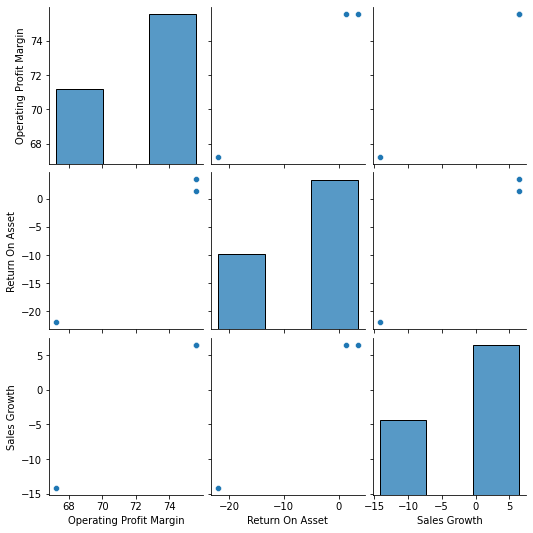

In [6]:
plt.figure(figsize=(15, 15))
sns.pairplot(df0, vars = df0.columns[1:13]);

In [7]:
df0 = pd.read_csv('../input/uts-big-data/UTS big data.csv')
df1 = df0[['DER','Operating Profit Margin' ,'Return On Asset','Sales Growth','Category']]
df1.describe()

,DER,Operating Profit Margin,Return On Asset,Sales Growth,Category
count,3.000000,3.000000,3.000000,3.000000,0.0
mean,1.342500,72.797333,-5.706533,-0.380933,NaN
std,0.502239,4.793739,14.116778,11.901845,NaN
min,0.857300,67.262000,-21.963000,-14.124000,NaN
25%,1.083650,71.413500,-10.290000,-3.816700,NaN
50%,1.310000,75.565000,1.383000,6.490600,NaN
75%,1.585100,75.565000,2.421700,6.490600,NaN
max,1.860200,75.565000,3.460400,6.490600,NaN


<AxesSubplot:xlabel='Emitten', ylabel='Operating Profit Margin'>

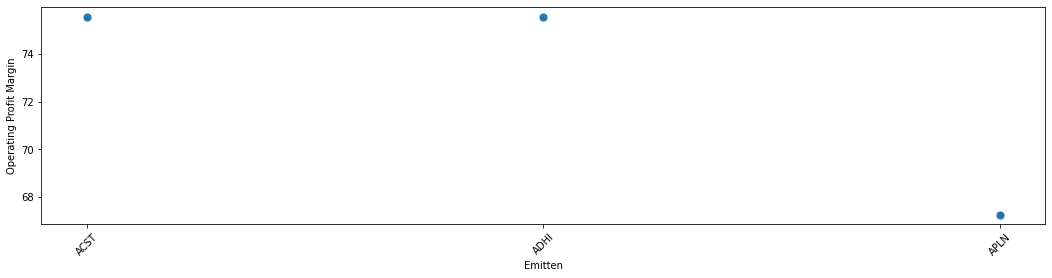

In [8]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Operating Profit Margin', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='DER'>

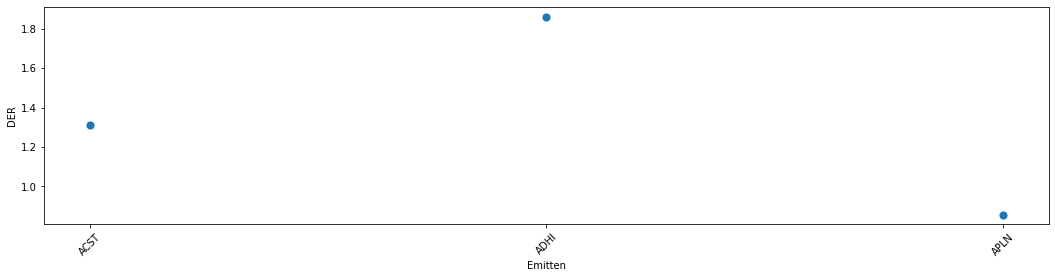

In [9]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='DER', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='Sales Growth'>

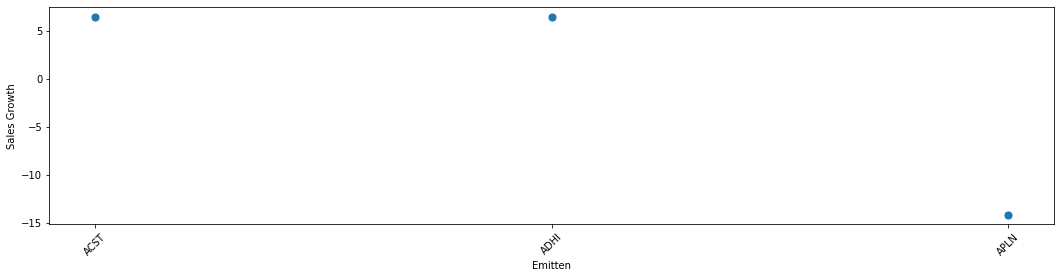

In [10]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Sales Growth', 
                data=df0, s=80)

In [11]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['Operating Profit Margin']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')


Jumlah baris sebelum memfilter outlier: 3
Jumlah baris setelah memfilter outlier: 3


In [12]:
df1.describe()

,DER,Operating Profit Margin,Return On Asset,Sales Growth,Category
count,3.000000,3.000000,3.000000,3.000000,0.0
mean,1.342500,72.797333,-5.706533,-0.380933,NaN
std,0.502239,4.793739,14.116778,11.901845,NaN
min,0.857300,67.262000,-21.963000,-14.124000,NaN
25%,1.083650,71.413500,-10.290000,-3.816700,NaN
50%,1.310000,75.565000,1.383000,6.490600,NaN
75%,1.585100,75.565000,2.421700,6.490600,NaN
max,1.860200,75.565000,3.460400,6.490600,NaN


In [13]:
feats = ['DER','Operating Profit Margin','Sales Growth']
X = df1[feats].values
y = df1['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER,Operating Profit Margin,Sales Growth
count,3.000000,3.000000e+00,3.000000
mean,0.000000,1.184238e-15,0.000000
std,1.224745,1.224745e+00,1.224745
min,-1.183193,-1.414214e+00,-1.414214
25%,-0.631223,-3.535534e-01,-0.353553
50%,-0.079253,7.071068e-01,0.707107
75%,0.591597,7.071068e-01,0.707107
max,1.262447,7.071068e-01,0.707107


In [14]:
from sklearn.cluster import KMeans
wcss=[]

In [15]:
df0.shape

(3, 6)

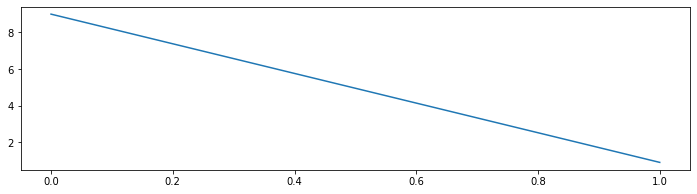

In [16]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 3):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 3))
plt.plot(inertia) #Elbow Method

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=2, random_state=0)

In [18]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

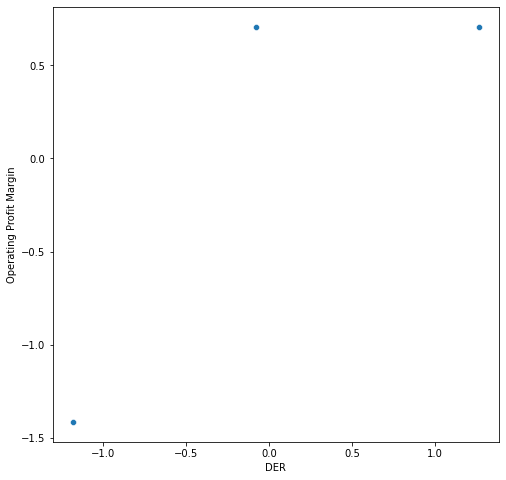

In [19]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='Operating Profit Margin', hue=new_df.target.to_list(), data=new_df);

In [20]:
new_df.head(5)

,DER,Operating Profit Margin,Sales Growth,target,fit
0,-0.079253,0.707107,0.707107,NaN,0
1,1.262447,0.707107,0.707107,NaN,0
2,-1.183193,-1.414214,-1.414214,NaN,1


In [21]:
new_df.insert(0,"Category",np.nan,True)
new_df.loc[new_df['fit'] == 0, 'Category'] = 2
new_df.loc[new_df['fit'] == 1, 'Category'] = 4
new_df.loc[new_df['fit'] == 2, 'Category'] = 1
new_df.loc[new_df['fit'] == 3, 'Category'] = 0
new_df.loc[new_df['fit'] == 4, 'Category'] = 3
new_df['Category'] = new_df['Category'].astype(int)
new_df.head(5)

,Category,DER,Operating Profit Margin,Sales Growth,target,fit
0,2,-0.079253,0.707107,0.707107,NaN,0
1,2,1.262447,0.707107,0.707107,NaN,0
2,4,-1.183193,-1.414214,-1.414214,NaN,1


In [22]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.columns = ['Category','DER (St.)','Operating Profit Margin (St.)', 'Sales Growth (St.)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       3 non-null      int64  
 1   DER (St.)                      3 non-null      float64
 2   Operating Profit Margin (St.)  3 non-null      float64
 3   Sales Growth (St.)             3 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 224.0 bytes


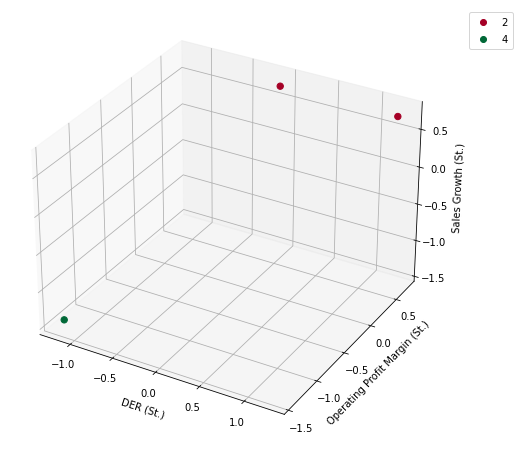

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['DER (St.)']
y = new_df['Operating Profit Margin (St.)']
z = new_df['Sales Growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

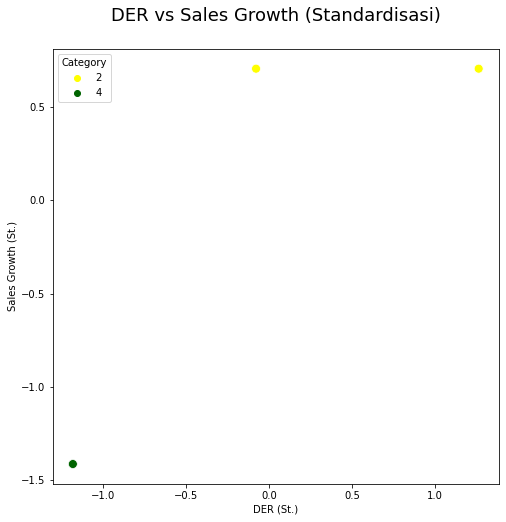

In [24]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

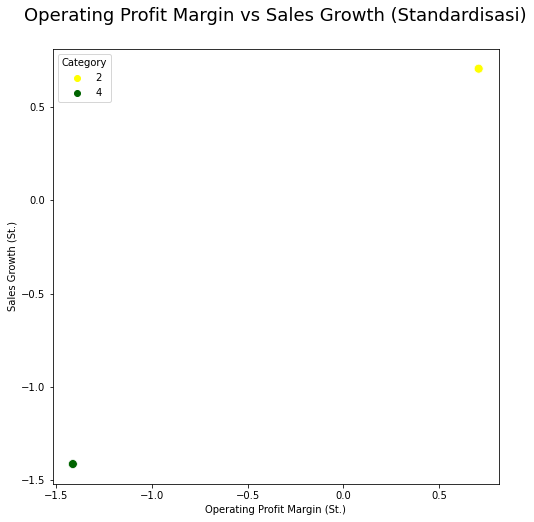

In [25]:
sns.scatterplot(x='Operating Profit Margin (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("Operating Profit Margin vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()


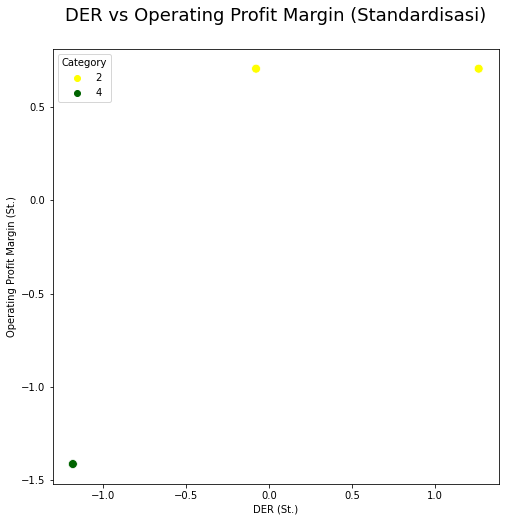

In [26]:
sns.scatterplot(x='DER (St.)', y='Operating Profit Margin (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Operating Profit Margin (Standardisasi)", fontsize=18, y=1.05)
plt.show()